In [1]:
import os 

from similarity_utils import *
from parser_with_lane import get_edge_df_from_bpmn

c:\Users\maria\anaconda3\envs\SNA_env\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

c:\Users\maria\anaconda3\envs\SNA_env\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [211]:
def load_files_from_folder(folder_path):
    try:
        # List all files in the folder
        files = []
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            # Check if it is a file
            if os.path.isfile(file_path):
                files.append(file_path)
        
        return files
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage
folder_path = "dati\\bpmn\X_g03"
files = load_files_from_folder(folder_path)
files = [file for file in files if file.endswith('.xml')]


In [212]:
all_files = files

In [4]:
#files_new = load_files_from_folder("dati\\bpmn\E_j01")
#files_new = [file for file in files_new if file.endswith('.xml')]

In [5]:
#all_files = files + files_new

In [213]:
all_files

['dati\\bpmn\\X_g03\\0.bpmn2.xml',
 'dati\\bpmn\\X_g03\\1.bpmn2.xml',
 'dati\\bpmn\\X_g03\\10.bpmn2.xml',
 'dati\\bpmn\\X_g03\\2.bpmn2.xml',
 'dati\\bpmn\\X_g03\\3.bpmn2.xml',
 'dati\\bpmn\\X_g03\\4.bpmn2.xml',
 'dati\\bpmn\\X_g03\\5.bpmn2.xml',
 'dati\\bpmn\\X_g03\\6.bpmn2.xml',
 'dati\\bpmn\\X_g03\\7.bpmn2.xml',
 'dati\\bpmn\\X_g03\\8.bpmn2.xml',
 'dati\\bpmn\\X_g03\\9.bpmn2.xml']

In [214]:
def check_file_similarity(file1, file2, model, verbose=False):
    edge_df1 = get_edge_df_from_bpmn(file1)
    edge_df2 = get_edge_df_from_bpmn(file2)

    G1 = obtain_graph(edge_df1)
    G2 = obtain_graph(edge_df2)

    if verbose:
        print(f"Graph 1 has:", G1.number_of_nodes(), "nodes and", G1.number_of_edges(), "edges")
        print(f"Graph 2 has:", G2.number_of_nodes(), "nodes and", G2.number_of_edges(), "edges")

    _, _, _, _, weighted_similarity_matrix, unweighted_similarity_matrix = get_similarity_matrix(G1, G2, model)
    return get_similarity_measure(weighted_similarity_matrix), get_similarity_measure(unweighted_similarity_matrix)

In [208]:
def compute_similarity_matrix(all_files, model):
    n = len(all_files)
    w_similarity_matrix = np.zeros((n, n))
    unw_similarity_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            # Compute similarity once for (i, j) and reuse it for (j, i)
            print(f"Computing similarity between {all_files[i]} and {all_files[j]}")
            w_similarity, unw_similairy = check_file_similarity(all_files[i], all_files[j], model)
            w_similarity_matrix[i, j] = w_similarity
            w_similarity_matrix[j, i] = w_similarity  # Exploit symmetry
            unw_similarity_matrix[i, j] = unw_similairy
            unw_similarity_matrix[j, i] = unw_similairy

    return w_similarity_matrix, unw_similarity_matrix

In [215]:
w_similarity_matrix, unw_similarity_matrix = compute_similarity_matrix(all_files, model)

Computing similarity between dati\bpmn\X_g03\0.bpmn2.xml and dati\bpmn\X_g03\0.bpmn2.xml
Detected 3 processes in the BPMN file
Detected 3 processes in the BPMN file
Computing similarity between dati\bpmn\X_g03\0.bpmn2.xml and dati\bpmn\X_g03\1.bpmn2.xml
Detected 3 processes in the BPMN file
Detected 1 processes in the BPMN file
Computing similarity between dati\bpmn\X_g03\0.bpmn2.xml and dati\bpmn\X_g03\10.bpmn2.xml
Detected 3 processes in the BPMN file
Detected 1 processes in the BPMN file
Computing similarity between dati\bpmn\X_g03\0.bpmn2.xml and dati\bpmn\X_g03\2.bpmn2.xml
Detected 3 processes in the BPMN file
Detected 1 processes in the BPMN file
Computing similarity between dati\bpmn\X_g03\0.bpmn2.xml and dati\bpmn\X_g03\3.bpmn2.xml
Detected 3 processes in the BPMN file
Detected 3 processes in the BPMN file
Computing similarity between dati\bpmn\X_g03\0.bpmn2.xml and dati\bpmn\X_g03\4.bpmn2.xml
Detected 3 processes in the BPMN file
Detected 1 processes in the BPMN file
Computing

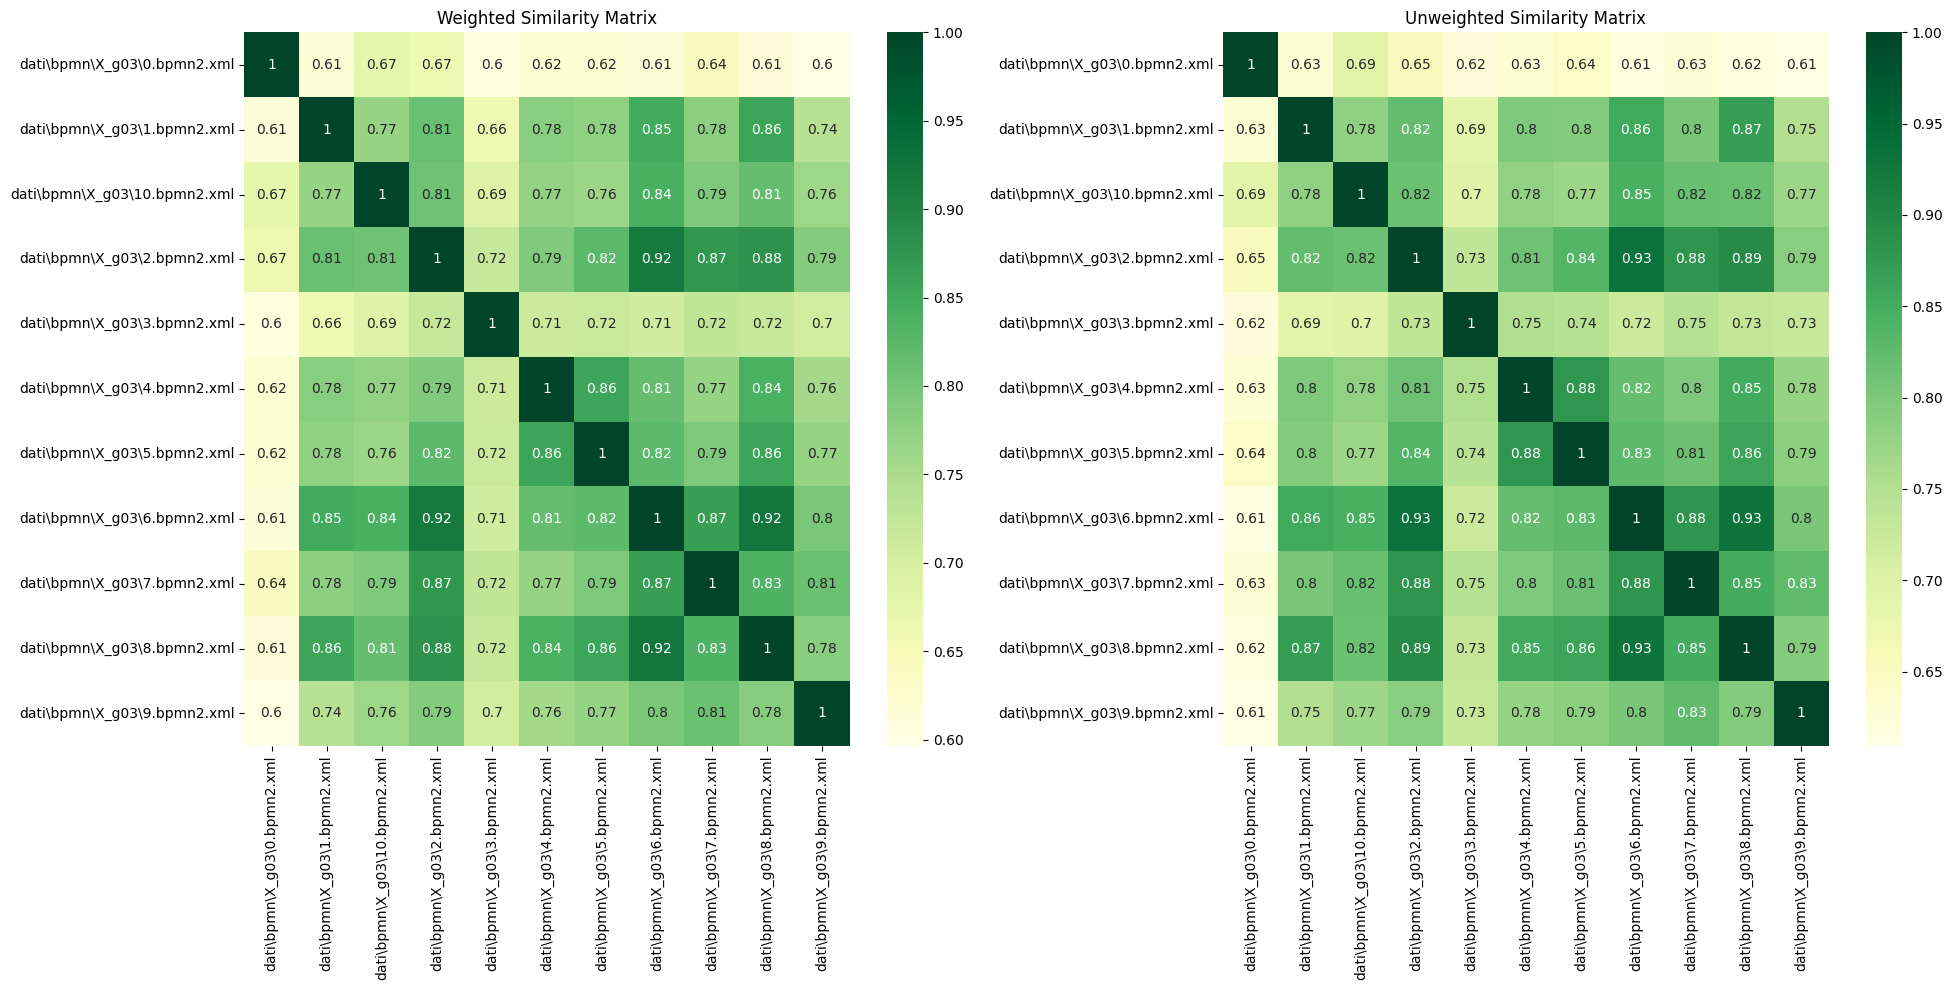

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust height for better fit (20, 10) for side-by-side comparison

# First subplot for weighted similarity matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.title("Weighted Similarity Matrix")
sns.heatmap(w_similarity_matrix, annot=True, xticklabels=all_files, yticklabels=all_files, cmap='YlGn')

# Second subplot for unweighted similarity matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.title("Unweighted Similarity Matrix")
sns.heatmap(unw_similarity_matrix, annot=True, xticklabels=all_files, yticklabels=all_files, cmap='YlGn')

plt.tight_layout()  # Adjust layout to prevent overlapping of plots
plt.show()
